In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

In [2]:
db=mysql.connector.connect(host="localhost",
                          username="root",
                          password="Root",
                          database="ecommerce")
cur=db.cursor()


# List All Cities Where Customers Are Located

In [3]:
query=""" select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count The No Of Order Place in 2017


In [4]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()
"Total orders placed in 2017 are",data[0][0]

('Total orders placed in 2017 are', 45101)

# Find The Total Sales Per category


In [5]:
query="""select upper(products.product_category) as category,round(sum(payments.payment_value),2) as sales
from products join order_items 
on products.product_id=order_items.product_id
join payments 
on payments.order_id=order_items.order_id
group by category
order by sales
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["Category","Sales"])
df

,Category,Sales
0,INSURANCE AND SERVICES,324.51
1,FASHION CHILDREN'S CLOTHING,785.67
2,CDS MUSIC DVDS,1199.43
3,HOUSE COMFORT 2,1710.54
4,PC GAMER,2174.43
...,...,...
69,WATCHES PRESENT,1429216.68
70,FURNITURE DECORATION,1430176.39
71,COMPUTER ACCESSORIES,1585330.45
72,HEALTH BEAUTY,1657373.12


# Calculate The Percentage Of orders that were paid in installments

In [6]:
query="""select (sum(case when payment_installments>=1 then 1 else 0 end ))/count(*)*100 from payments
"""
cur.execute(query)
data=cur.fetchall()
"The Percentage Of Orders Are Paid In Installments",data[0][0]

('The Percentage Of Orders Are Paid In Installments', Decimal('99.9981'))

In [7]:
query="""select (sum(case when payment_installments>1 then 1 else 0 end ))/count(*)*100 from payments
"""
cur.execute(query)
data=cur.fetchall()
data

[(Decimal('49.4176'),)]

# Count The Number oF Customers From Each State

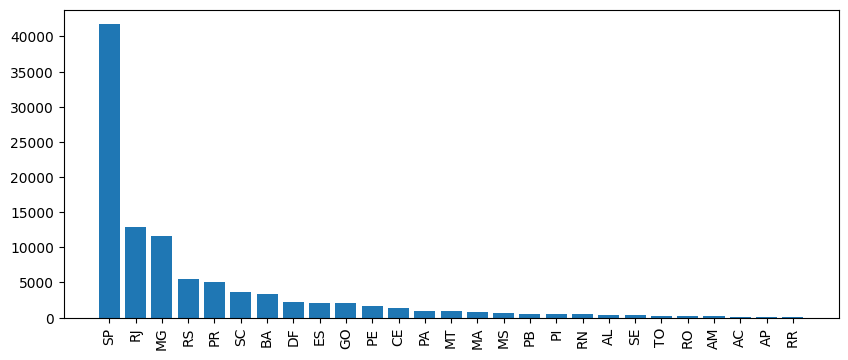

In [8]:
query="""select customer_state,count(customer_id)
from customers group by customer_state
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["state","Customer_count"])
df=df.sort_values(by="Customer_count",ascending=False)
plt.figure(figsize=(10,4))  #height,width
plt.bar(df['state'],df['Customer_count'])
plt.xticks(rotation=90)
plt.show()

# Intermediate Queries

# Q.1 Calculate The Orders Per Month In 2018

In [9]:
query=""" select monthname(order_purchase_timestamp) months,count(order_id) order_count
from orders where year(order_purchase_timestamp)=2018
group by months

"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["months","order_count"])
df

,months,order_count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


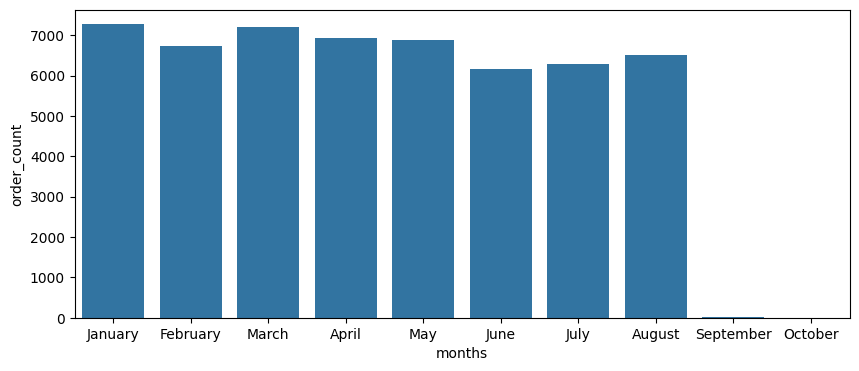

In [10]:
o=["January","February","March","April","May","June","July","August","September","October"]
plt.figure(figsize=(10,4))
sns.barplot(x=df['months'],y=df['order_count'],data=df,order=o)
plt.show()

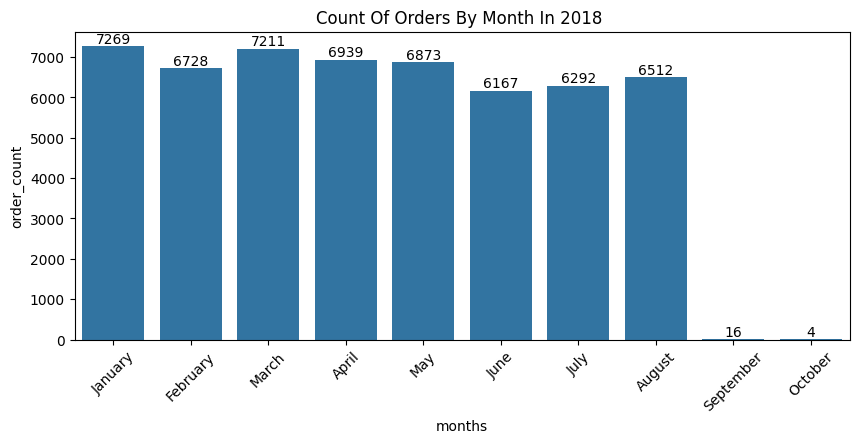

In [11]:
o=["January","February","March","April","May","June","July","August","September","October"]
plt.figure(figsize=(10,4))
ax=sns.barplot(x=df['months'],y=df['order_count'],data=df,order=o)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count Of Orders By Month In 2018 ")
plt.show()

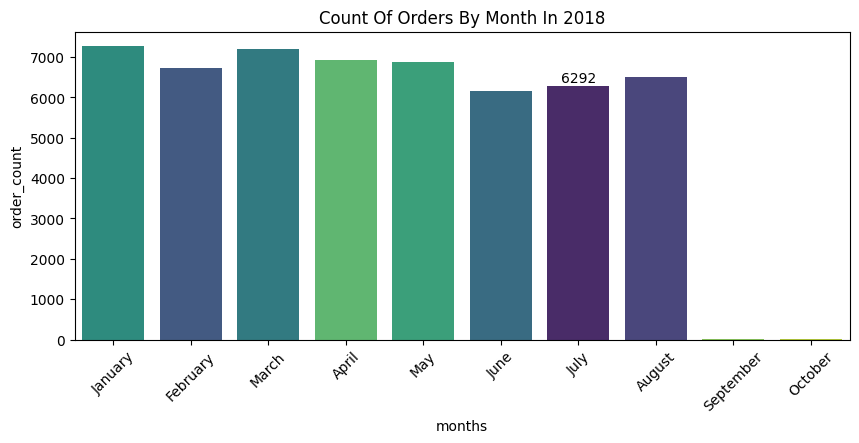

In [12]:
o=["January","February","March","April","May","June","July","August","September","October"]
plt.figure(figsize=(10,4))
ax=sns.barplot(x=df['months'],y=df['order_count'],data=df,order=o,hue=df['months'],palette="viridis")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count Of Orders By Month In 2018")
plt.show()

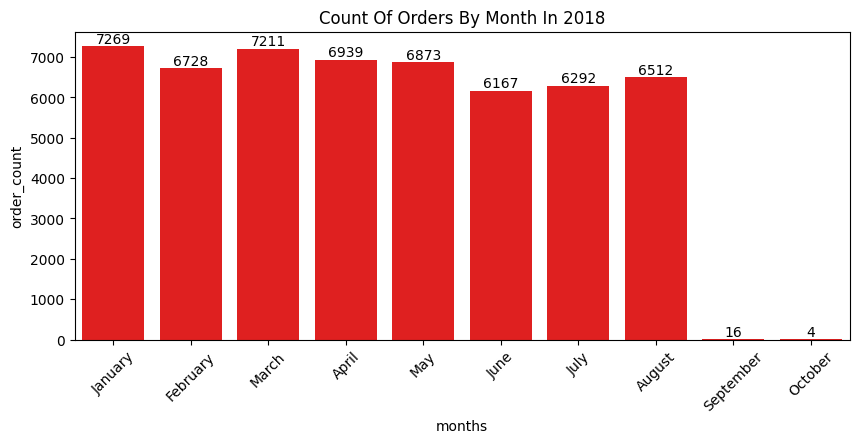

In [13]:
o=["January","February","March","April","May","June","July","August","September","October"]
plt.figure(figsize=(10,4))
ax=sns.barplot(x=df['months'],y=df['order_count'],data=df,order=o,color='red')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count Of Orders By Month In 2018")
plt.show()

# Q.2 Find The Average number of products per order,grouped by customer city


In [14]:
# Q.2 Find The Average number of products per order,grouped by customer city
query=""" with count_per_order as 
(select orders.order_id,orders.customer_id ,count(order_items.order_id) as oc 
from orders
join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)
select customers.customer_city, round(avg(count_per_order.oc),2) as average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Customer_city","Average_products_per_order"])
df.head(10)

,Customer_city,Average_products_per_order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# Calculate The Percentage of total revenue contributor by each category

In [15]:
query="""select upper(products.product_category) as category,round
((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2)
 as sales_percentage
from products join order_items 
on products.product_id=order_items.product_id
join payments 
on payments.order_id=order_items.order_id
group by category
order by sales_percentage desc;"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["Category","Percentage_Distribution"])
df

,Category,Percentage_Distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


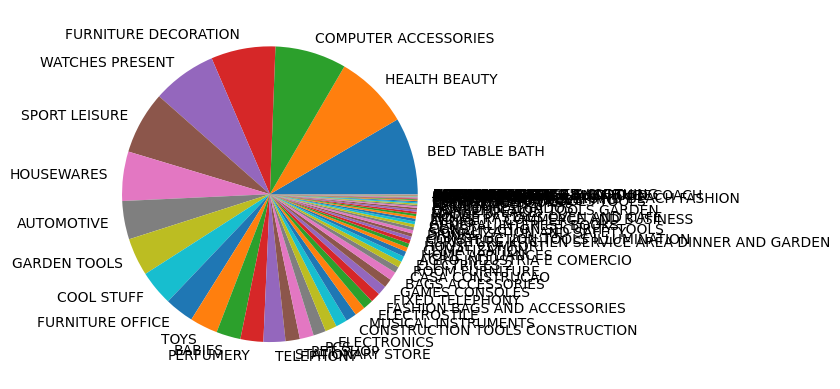

In [16]:
plt.pie(df["Percentage_Distribution"],labels=df["Category"])
plt.show()

# Identify The Co-relation Betweeen The Product Price And No of TImes The Product Purchaesd

In [17]:
#No OF Times The Product Purchased

query="""select  products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2) as average_price
from products 
join
order_items
on products.product_id=order_items.product_id
group by products.product_category"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","Order_count","Price"])
df.head()

,Category,Order_count,Price
0,HEALTH BEAUTY,9670,130.16
1,sport leisure,8641,114.34
2,Cool Stuff,3796,167.36
3,computer accessories,7827,116.51
4,Watches present,5991,201.14


In [18]:
arr1=df["Order_count"]
arr2=df["Price"]
a=np.corrcoef([arr1,arr2])
print("The Correlation Between Price And Number Of Times Product Has Been Purchased",a[0][1])

The Correlation Between Price And Number Of Times Product Has Been Purchased -0.10631514167157562


In [19]:
query="""select  products.product_category,
count(order_items.product_id) ,
round(avg(order_items.price),2) as average_price,
round(round(avg(order_items.price),2)*count(order_items.product_id),2) as Total_price
from products 
join
order_items
on products.product_id=order_items.product_id
group by products.product_category"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","Order_count","Price","Total_price"])
df.head()

,Category,Order_count,Price,Total_price
0,HEALTH BEAUTY,9670,130.16,1258647.20
1,sport leisure,8641,114.34,988011.94
2,Cool Stuff,3796,167.36,635298.56
3,computer accessories,7827,116.51,911923.77
4,Watches present,5991,201.14,1205029.74


In [20]:
arr1=df["Order_count"]
arr2=df["Total_price"]
b=np.corrcoef([arr1,arr2])

In [21]:
print("The Correlation Between Price And Number Of Times Product Has Been Purchased",b[0][1])

The Correlation Between Price And Number Of Times Product Has Been Purchased 0.9503279934729992


# Calculate The Total Revenue Genrated By Each Seller And Rank Them By Revenue


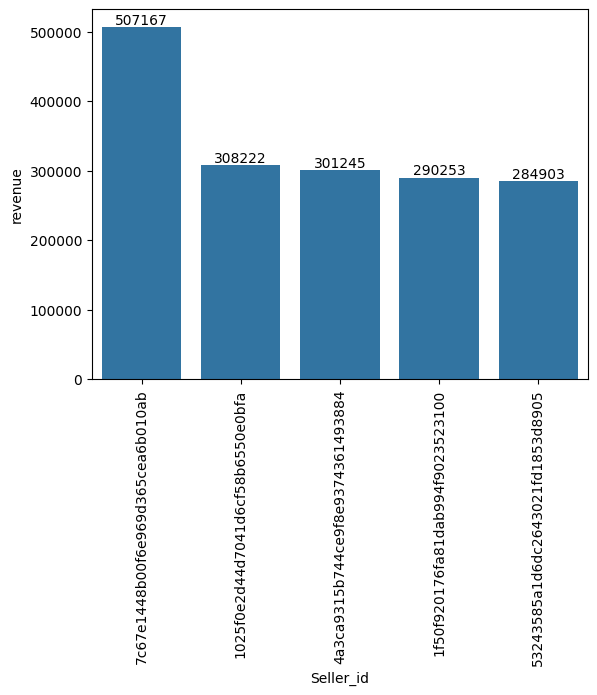

In [22]:
query="""select *,dense_rank() over(order by revenue desc) as rn from 
(select order_items.seller_id,sum(payments.payment_value) revenue
from order_items 
join payments
on order_items.order_id=payments.order_id
group by  order_items.seller_id) as a """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Seller_id","revenue","rank"])
df=df.head()
ax=sns.barplot(x="Seller_id",y="revenue",data=df)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])

plt.show()


# Some Advance Queries

# Calculate the moving average of order values for each customer over their order history

In [23]:
query="""select customer_id,order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row) as mov_avg 
from
(select orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment from payments
join orders
on payments.order_id=orders.order_id) as a;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Customer_id","Time_stamp","Price","Moving_Average"])
df

,Customer_id,Time_stamp,Price,Moving_Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year.

In [24]:
query="""
select years,Months,payment,sum(payment)
over(order by years,Months) cummulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as Months,
round(sum(payments.payment_value),2) as payment from orders join 
payments
on orders.order_id=payments.order_id
group by years,Months order by years,Months
) as a
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Year","Months","Sales","Cummulative_Sales"])
df

,Year,Months,Sales,Cummulative_Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales.

In [25]:
query="""
select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join 
payments
on orders.order_id=payments.order_id
group by years order by years

"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["Year","Sales"])
df

,Year,Sales
0,2016,59362.34
1,2017,7249746.73
2,2018,8699763.05


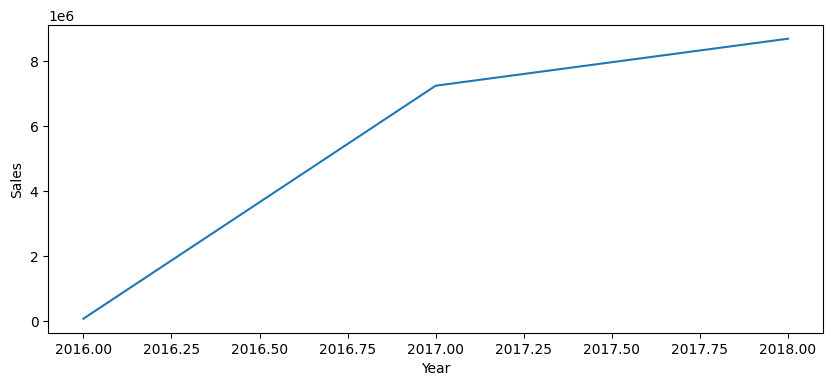

In [26]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df,x="Year",y="Sales")
plt.show()

In [30]:
query="""
with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join 
payments
on orders.order_id=payments.order_id
group by years order by years)
select years,((payment-lag(payment,1) over(order by years))/lag(payment,1) over(order by years)) *100 from a
"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["Year","yoy% Growth"])
df

,Year,yoy% Growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [31]:
query="""with a as (SELECT customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id=orders.customer_id
group by customers.customer_id),
b as (select  a.customer_id,count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id=a.customer_id
and orders.order_purchase_timestamp>first_order
and orders.order_purchase_timestamp<date_add(first_order,interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b
on a.customer_id=b.customer_id;"""
cur.execute(query)
data=cur.fetchall()
data

[(None,)]

In [ ]:
#Since None OF Our Customer Repeated

# Identify the top 3 customers who spent the most money in each year.

In [37]:
query="""
select years,customer_id,payment,d_rank from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment, 
dense_rank() over(partition by year(orders.order_purchase_timestamp) 
order by sum(payments.payment_value)desc) d_rank
from orders join payments
on orders.order_id=payments.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank<=3 """

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Year","Id","Amount","Rank"])
df

,Year,Id,Amount,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'a9dc96b027d1252bbac0a9b72d837fc6'),
  Text(1, 0, '1d34ed25963d5aae4cf3d7f3a4cda173'),
  Text(2, 0, '4a06381959b6670756de02e07b83815f'),
  Text(3, 0, '1617b1357756262bfa56ab541c47bc16'),
  Text(4, 0, 'c6e2731c5b391845f6800c97401a43a9'),
  Text(5, 0, '3fd6777bbce08a352fddd04e4a7cc8f6'),
  Text(6, 0, 'ec5b2ba62e574342386871631fafd3fc'),
  Text(7, 0, 'f48d464a0baaea338cb25f816991ab1f'),
  Text(8, 0, 'e0a2412720e9ea4f26c1ac985f6a7358')])

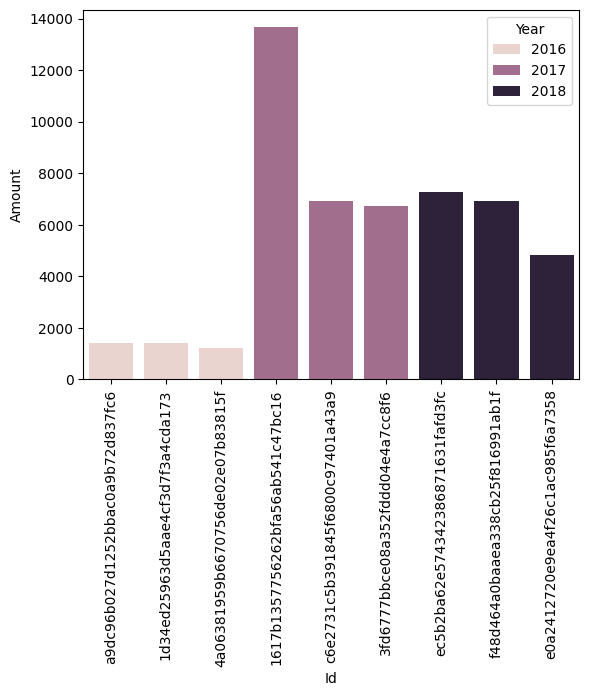

In [39]:
sns.barplot(x="Id",y="Amount",data=df,hue="Year")
plt.xticks(rotation=90)

In [40]:
query="""
select years,customer_id,payment,d_rank from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment, 
dense_rank() over(partition by year(orders.order_purchase_timestamp) 
order by sum(payments.payment_value)desc) d_rank
from orders join payments
on orders.order_id=payments.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank = 1 """

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Year","Id","Amount","Rank"])
df

,Year,Id,Amount,Rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
2,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1


([0, 1, 2],
 [Text(0, 0, 'a9dc96b027d1252bbac0a9b72d837fc6'),
  Text(1, 0, '1617b1357756262bfa56ab541c47bc16'),
  Text(2, 0, 'ec5b2ba62e574342386871631fafd3fc')])

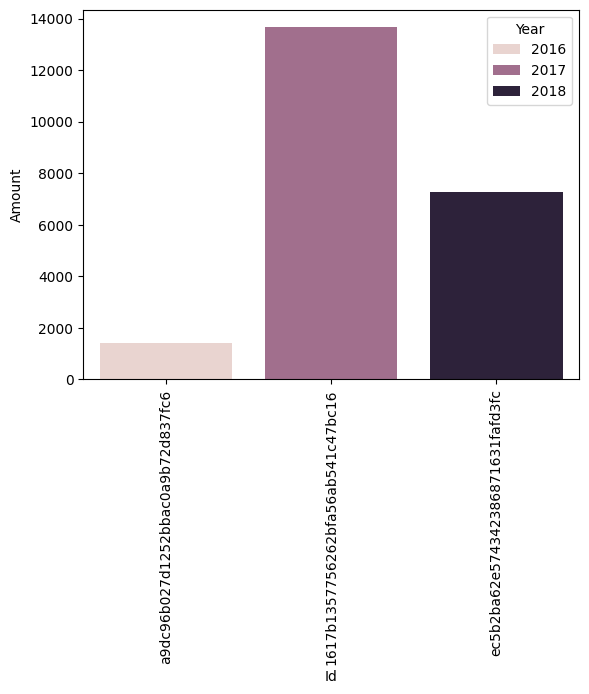

In [41]:
sns.barplot(x="Id",y="Amount",data=df,hue="Year")
plt.xticks(rotation=90)